Задание 1 (1/2)

Шаг 1. Выбрать из датасета несколько переменных (2-3, лучше непрерывной СВ), которые в последствии будут основными при работе с МСВ и МСП.

Шаг 2а. Сделать непараметрические оценки плотности распределения в виде гистограммы и ядерной оценки.

Шаг 2б. Оценить выборочные статистики и доверительные интервалы для них.

Шаг 3. Сделать оценки порядковых статистик и представить их в форме «ящика с усами».

Шаг 4. На основе информации о форме распределения, сделать предположения о возможных 
теоретических законах распределения, которые стоит оценить.

Шаг 5. Оценить параметры выбранных законов распределения с помощью метода максимального правдоподобия и метода наименьших квадратов.

Шаг 6. Провалидировать полученные распределения на квантильных биплотах.

Шаг 7. Оценить статистическую достоверность подобранных распределений, проверив критерии согласия (не менее 2, на выбор).

                                                                                ---Датасет---

Был выбран датасет, содержащий ежедневные данные о погоде с многочисленных австралийсих метеостанций.

In [118]:
# Импорт пакетов 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns

In [119]:
# Импорт данных из csv-файла - 
# ежедневные данные о погоде с многочисленных австралийских метеостанций.

path_to_file = 'weatherAUS.csv'
source_df = pd.read_csv(path_to_file, engine='python')

source_df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


Шаг 1. Выбрать из датасета несколько переменных (2-3, лучше непрерывной СВ), которые в последствии будут основными при работе с МСВ и МСП.

Из выбранного датасета были выбраны следующие три переменные: 


Temp3pm -- температура в три часа дня.

Evaporation -- испарения;

Sunshine -- солнечный свет.

In [120]:
#Отбираем нужные параметры
new_df = source_df[['Temp3pm','Evaporation','Sunshine']]

#Удаление значений Nan
#Можно заполнить средними, если мало пропусков.
new_df = new_df.dropna()

new_df.head(5)

,Temp3pm,Evaporation,Sunshine
5939,33.4,12.0,12.3
5940,27.0,14.8,13.0
5941,32.7,12.6,13.3
5942,34.9,10.8,10.6
5943,35.6,11.4,12.2


Шаг 2а. Сделать непараметрические оценки плотности распределения в виде гистограммы и ядерной оценки.

<AxesSubplot:xlabel='Temp3pm', ylabel='Density'>

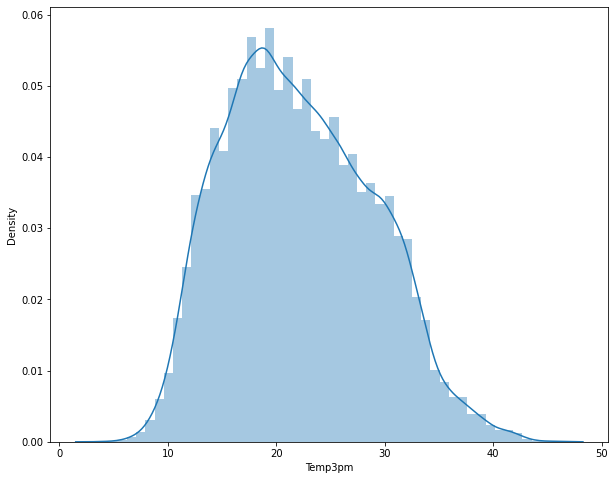

In [121]:
# Построение гистограммы и ядерной оценки плотности
plt.figure(figsize=(10, 8))
sns.distplot(new_df['Temp3pm'], kde=True, norm_hist=True, label=f'Температура в три часа дня')

# Разобраться с облачностью и испарением.
# В испарении проблема с нулями.
# Найти информацию про распредления испарений.

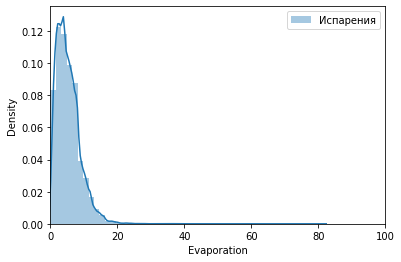

In [122]:
# Разбить на отдельные графы.
sns.distplot(new_df['Evaporation'], kde=True, norm_hist=True, label=f'Испарения')

# Отображаем значения по оси абсцисс только в интервале [0, 100]
plt.xlim(0, 100)
plt.legend()
plt.show()

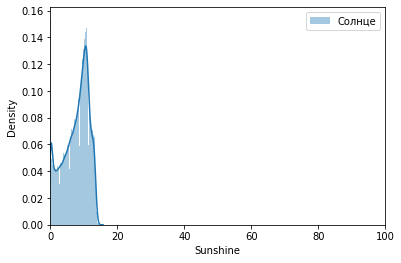

In [123]:
sns.distplot(new_df['Sunshine'], kde=True, norm_hist=True, label=f'Солнце')

# Отображаем значения по оси абсцисс только в интервале [0, 100]
plt.xlim(0, 100)
plt.legend()
plt.show()

Шаг 2б. Оценить выборочные статистики и доверительные интервалы для них.


In [124]:
# Вычисление выборочного среднего, дисперсии, СКО, медианы
mean_temp = new_df['Temp3pm'].mean()
var_temp = new_df['Temp3pm'].var()
std_temp = new_df['Temp3pm'].std()
median_temp = new_df['Temp3pm'].median()

mean_eva = new_df['Evaporation'].mean()
var_eva = new_df['Evaporation'].var()
std_eva = new_df['Evaporation'].std()
median_eva = new_df['Evaporation'].median()

mean_sun = new_df['Sunshine'].mean()
var_sun = new_df['Sunshine'].var()
std_sun = new_df['Sunshine'].std()
median_sun = new_df['Sunshine'].median()

# Вычисление усеченного среднего, с усечением 10% наибольших и наименьших значений
trimmed_mean_temp = scipy.stats.trim_mean(new_df['Temp3pm'], proportiontocut=0.1)
trimmed_mean_eva = scipy.stats.trim_mean(new_df['Evaporation'], proportiontocut=0.1)
trimmed_mean_sun = scipy.stats.trim_mean(new_df['Sunshine'], proportiontocut=0.1)

#median absolute deviation
def mad(df):
    #параметр для логнормального распределения
    sigma = 1.2
    k = scipy.stats.lognorm.ppf(3/4., s=sigma)
    median = df.median()
    
    return k * np.median(np.fabs(df - median))

#median absolute deviation
def mad_norm(df):
    #параметр для логнормального распределения
    sigma = 1.2
    k = scipy.stats.norm.ppf(3/4.)
    median = df.median()
    
    return k * np.median(np.fabs(df - median))


# Вычисление MAD-характеристики (Median Absolute Deviation)
mad_value_temp = mad(new_df['Temp3pm'])
mad_value_eva = mad_norm(new_df['Evaporation'])
mad_value_sun = mad(new_df['Sunshine'])

print(f'Средний размер температуры в три часа дня: среднее = {int(mean_temp)}, дисперсия = {int(var_temp)}, СКО = {int(std_temp)},\n'
      f'медиана = {int(median_temp)}, усеченное среднее {int(trimmed_mean_temp)}, MAD = {int(mad_value_temp)}')
print('\n')
print(f'Средний размер испарений: среднее = {int(mean_eva)}, дисперсия = {int(var_eva)}, СКО = {int(std_eva)},\n'
      f'медиана = {int(median_eva)}, усеченное среднее {int(trimmed_mean_eva)}, MAD = {int(mad_value_eva)}')
print('\n')
print(f'Средний размер солнечного света: среднее = {int(mean_sun)}, дисперсия = {int(var_sun)}, СКО = {int(std_sun)},\n'
      f'медиана = {int(median_sun)}, усеченное среднее {int(trimmed_mean_sun)}, MAD = {int(mad_value_sun)}')

Средний размер температуры в три часа дня: среднее = 22, дисперсия = 46, СКО = 6,
медиана = 21, усеченное среднее 21, MAD = 11


Средний размер испарений: среднее = 5, дисперсия = 13, СКО = 3,
медиана = 4, усеченное среднее 4, MAD = 1


Средний размер солнечного света: среднее = 7, дисперсия = 14, СКО = 3,
медиана = 8, усеченное среднее 7, MAD = 5


In [125]:
# Расчет 95% доверительного интервала для выборочного среднего
norm_q95 = scipy.stats.norm.ppf(0.95)
mean_conf = norm_q95 * std_temp / np.sqrt(len(new_df))

# Расчет 95% доверительных интервалов для дисперсии и СКО
chi2_q95_left = scipy.stats.chi2.ppf((1 - 0.05 / 2.0), df=len(new_df) - 1)
chi2_q95_right = scipy.stats.chi2.ppf(0.05 / 2.0, df=len(new_df) - 1)

var_conf_left = var_temp * (len(new_df) - 1) / chi2_q95_left
var_conf_right = var_temp * (len(new_df) - 1) / chi2_q95_right
std_conf_left = np.sqrt(var_conf_left)
std_conf_right = np.sqrt(var_conf_right)

# Вывод полученных значений в консоль
print("Выборочное среднее: %0.3f +/- %0.3f" % (mean_temp, mean_conf))
print("95%% Доверительный интервал выборочной дисперсии : (%0.3f; %0.3f)"
      % (var_conf_left, var_conf_right))
print("95%% Доверительный интервал выборочного СКО: (%0.3f; %0.3f)"
      % (std_conf_left, std_conf_right))

Выборочное среднее: 22.133 +/- 0.042
95% Доверительный интервал выборочной дисперсии : (45.686; 46.652)
95% Доверительный интервал выборочного СКО: (6.759; 6.830)


Шаг 3. Сделать оценки порядковых статистик и представить их в форме «ящика с усами».

[Text(0, 0.5, '')]

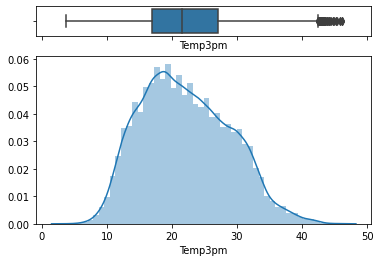

In [127]:
# Боксплот для температуры.
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
sns.boxplot(new_df['Temp3pm'], ax=ax_box)
sns.distplot(new_df['Temp3pm'], ax=ax_hist)
 
ax_box.set(ylabel='')
ax_hisy=t=.set(ylabel='')

[Text(0, 0.5, '')]

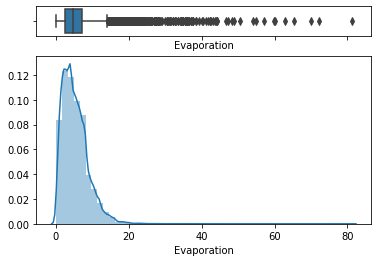

In [98]:
# Боксплот для испарения.
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
sns.boxplot(new_df['Evaporation'], ax=ax_box)
sns.distplot(new_df['Evaporation'], ax=ax_hist)
 
ax_box.set(ylabel='')
ax_hist.set(ylabel='')

[Text(0, 0.5, '')]

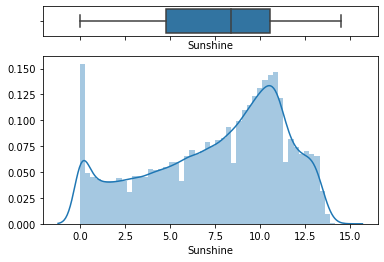

In [95]:
# Боксплот для температуры.
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
sns.boxplot(new_df['Sunshine'], ax=ax_box)
sns.distplot(new_df['Sunshine'], ax=ax_hist)
 
ax_box.set(ylabel='')
ax_hist.set(ylabel='')

Шаг 4. На основе информации о форме распределения, сделать предположения о возможных теоретических законах распределения, которые стоит оценить.

Возможно подходят следующие законы распределения:
- логнормальное распределение;
- нормальное распределение.

Шаг 5. Оценить параметры выбранных законов распределения с помощью метода максимального правдоподобия и метода наименьших квадратов.

In [17]:
# Определение параметров логнормального распределения температуры в три часа дня
x = np.linspace(np.min(new_df['Temp3pm']), np.max(new_df['Temp3pm']))

# Параметры распределения определяются при помощи функции fit на основе метода максимального правдоподобия 
params = scipy.stats.lognorm.fit(new_df['Temp3pm'])
pdf = scipy.stats.lognorm.pdf(x, *params)

Шаг 6. Провалидировать полученные распределения на квантильных биплотах.

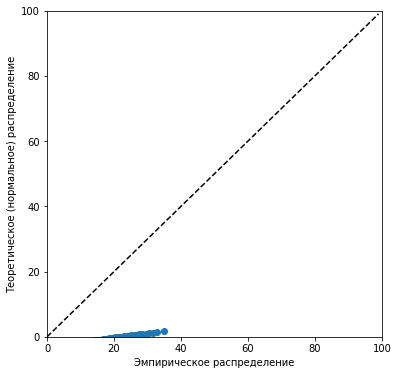

In [116]:
# Построение квантильного биплота для эмпирического и теоретического (логнормального) распределения

# Расчет квантилей
percs = np.linspace(0, 100, 31)
qn_first = np.percentile(new_df['Temp3pm'], percs)
qn_norm = scipy.stats.norm.ppf(percs/ 100.0)
qn_lognorm = scipy.stats.lognorm.ppf(percs / 100.0, *params)

# Построение квантильного биплота для нормального распределения.
plt.figure(figsize=(6, 6))
plt.plot(qn_first, qn_norm, ls="", marker="o", markersize=6)
plt.plot(range(0,100), range(0,100), color="k", ls="--")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel(f'Эмпирическое распределение')
plt.ylabel('Теоретическое (нормальное) распределение')

plt.show()

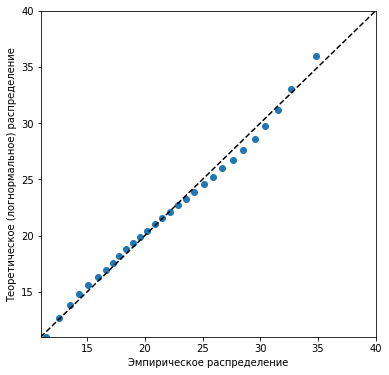

In [91]:
# Построение квантильного биплота для логнормального распределения.
plt.figure(figsize=(6, 6))
plt.plot(qn_first, qn_lognorm, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(11, 40)
plt.ylim(11, 40)
plt.xlabel(f'Эмпирическое распределение')
plt.ylabel('Теоретическое (логнормальное) распределение')

plt.show()

Шаг 5. Оценить параметры выбранных законов распределения с помощью метода максимального правдоподобия и метода наименьших квадратов.

In [90]:
# Определение параметров нормального распределения испарения
x_eva = np.linspace(np.min(new_df['Evaporation']), np.max(new_df['Evaporation']))

# Параметры распределения определяются при помощи функции fit на основе метода максимального правдоподобия 
params_eva = scipy.stats.lognorm.fit(new_df['Evaporation'])
pdf_eva = scipy.stats.lognorm.pdf(x, *params)

Шаг 6. Провалидировать полученные распределения на квантильных биплотах.

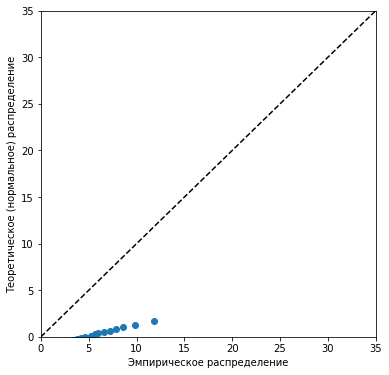

In [71]:
# Построение квантильного биплота для эмпирического и теоретического (нормального) распределения

# Расчет квантилей
qn_first = np.percentile(new_df['Evaporation'], percs)
qn_norm = scipy.stats.norm.ppf(percs / 100.0)
qn_lognorm = scipy.stats.lognorm.ppf(percs / 100.0, *params_eva)

# Нормальное распределение + зашумляющее испарение.
# Поискать ответы в описании датасета.

# Построение квантильного биплота для нормального распределения.
plt.figure(figsize=(6, 6))
plt.plot(qn_first, qn_norm, ls="", marker="o", markersize=6)
plt.plot(x_eva, x_eva, color="k", ls="--")
plt.xlim(0, 35)
plt.ylim(0, 35)
plt.xlabel(f'Эмпирическое распределение')
plt.ylabel('Теоретическое (нормальное) распределение')

plt.show()

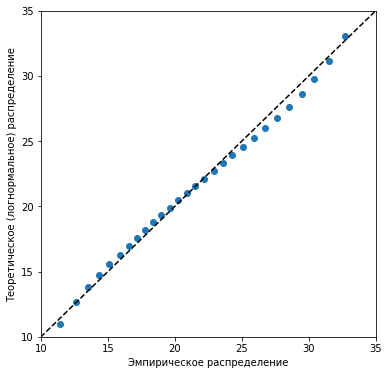

In [105]:
# Построение квантильного биплота для логнормального распределения.
plt.figure(figsize=(6, 6))
plt.plot(qn_first, qn_lognorm, ls="", marker="o", markersize=6)
plt.plot(x_eva, x_eva, color="k", ls="--")
plt.xlim(10, 35)
plt.ylim(10, 35)
plt.xlabel(f'Эмпирическое распределение')
plt.ylabel('Теоретическое (логнормальное) распределение')

plt.show()

Шаг 5. Оценить параметры выбранных законов распределения с помощью метода максимального правдоподобия и метода наименьших квадратов.

In [74]:
# Определение параметров логнормального распределения солнечного света
x_sun = np.linspace(np.min(new_df['Sunshine']), np.max(new_df['Sunshine']))

# Параметры распределения определяются при помощи функции fit на основе метода максимального правдоподобия 
params_sun = scipy.stats.lognorm.fit(new_df['Sunshine'])
pdf_sun = scipy.stats.lognorm.pdf(x, *params_sun)

Шаг 6. Провалидировать полученные распределения на квантильных биплотах.

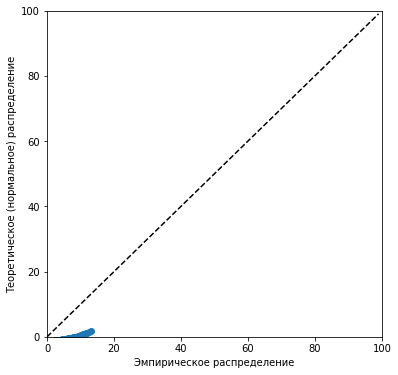

In [117]:
# Построение квантильного биплота для эмпирического и теоретического (логнормального) распределения

# Распредление Вибула.
# Расчет квантилей
qn_first = np.percentile(new_df['Sunshine'], percs)
qn_norm = scipy.stats.norm.ppf(percs / 100.0)
qn_lognorm = scipy.stats.lognorm.ppf(percs / 100.0, *params_sun)

# Построение квантильного биплота для нормального распределения.
plt.figure(figsize=(6, 6))
plt.plot(qn_first, qn_norm, ls="", marker="o", markersize=6)
plt.plot(range(0,100), range(0,100), color="k", ls="--")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel(f'Эмпирическое распределение')
plt.ylabel('Теоретическое (нормальное) распределение')

plt.show()

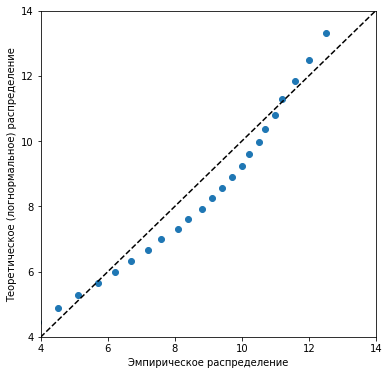

In [80]:
# Построение квантильного биплота для логнормального распределения.
plt.figure(figsize=(6, 6))
plt.plot(qn_first, qn_lognorm, ls="", marker="o", markersize=6)
plt.plot(x_sun, x_sun, color="k", ls="--")
plt.xlim(4, 14)
plt.ylim(4, 14)
plt.xlabel(f'Эмпирическое распределение')
plt.ylabel('Теоретическое (логнормальное) распределение')

plt.show()

Шаг 7. Оценить статистическую достоверность подобранных распределений, проверив критерии согласия (не менее 2, на выбор).

In [135]:
# Расчет критерия Колмогорова-Смирнова и хи-квадрат
ks = scipy.stats.kstest(new_df['Temp3pm'],  'lognorm', params_eva, N=100)
chi2 = scipy.stats.chisquare(new_df['Temp3pm'])
print(ks)
print(chi2)

KstestResult(statistic=0.9005979460041512, pvalue=0.0)
Power_divergenceResult(statistic=146252.71792151136, pvalue=0.0)


In [130]:
# Расчет критерия Колмогорова-Смирнова и хи-квадрат
ks = scipy.stats.kstest(new_df['Evaporation'], 'lognorm', params_eva, N=100)
chi2 = scipy.stats.chisquare(new_df['Evaporation'])
print(ks)
print(chi2)

KstestResult(statistic=0.0394432871311049, pvalue=3.197132163928282e-95)
Power_divergenceResult(statistic=178731.04020666966, pvalue=0.0)


In [84]:
# Расчет критерия Колмогорова-Смирнова и хи-квадрат
ks = scipy.stats.kstest(new_df['Sunshine'], 'lognorm', params_sun, N=100)
chi2 = scipy.stats.chisquare(new_df['Sunshine'])
print(ks)
print(chi2)

KstestResult(statistic=0.0950474568041283, pvalue=0.0)
Power_divergenceResult(statistic=131395.6627896397, pvalue=0.0)
